In [20]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta


tf.random.set_seed(20)
np.random.seed(10)

# Data Transformation

In [2]:
data = yf.download(tickers = 'TSLA', start='2009-10-18', end='2024-10-18', interval='1d')
data_5m = yf.download(tickers= "TSLA", interval="5m", start="2024-09-29", end="2024-11-27")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2010-06-29 00:00:00+00:00,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30 00:00:00+00:00,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01 00:00:00+00:00,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02 00:00:00+00:00,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06 00:00:00+00:00,1.074000,1.074000,1.333333,1.055333,1.333333,103003500


In [4]:
data_5m.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Datetime,,,,,,
2024-09-30 13:30:00+00:00,262.329987,262.329987,262.679901,258.100006,259.000000,6188648
2024-09-30 13:35:00+00:00,262.505005,262.505005,263.229706,260.779999,262.300598,2494671
2024-09-30 13:40:00+00:00,264.084991,264.084991,264.279999,262.100006,262.484985,2295295
2024-09-30 13:45:00+00:00,263.385010,263.385010,264.729095,263.339996,264.129913,2053212
2024-09-30 13:50:00+00:00,264.373596,264.373596,264.859985,263.109985,263.360107,1996616


In [5]:
# Rename columns to the first value in the tuple
data.columns = data.columns.get_level_values(0)
data_5m.columns = data_5m.columns.get_level_values(0)

EMAF: Stands for Exponential Moving Average - Fast.

It is calculated using a short period (length=20 in your script), making it a faster-moving average that reacts more quickly to price changes. 


EMAM: Stands for Exponential Moving Average - Medium.

It uses a medium-length period (length=100 in your script) and moves more slowly than the fast EMA, providing a smoother trend line.


Why: RSI helps identify overbought and oversold conditions, signaling potential reversals or entry/exit points.  

Why: MACD combines trend and momentum, providing reliable signals for trend reversals and strength.  

Why: ATR measures volatility and helps set appropriate stop-loss levels or assess risk.  

Why: Bollinger Bands help identify breakout opportunities and assess volatility.  

Why: VWAP is a crucial benchmark for intraday trading, showing where most of the trading volume occurred.  




In [6]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=10)
data['EMAM']=ta.ema(data.Close, length=50)
# data['EMAS']=ta.ema(data.Close, length=150)
data['VWAP'] = ta.vwap(data.High, data.Low, data.Close, data.Volume)
data['RSI'] = ta.rsi(data.Close, length=14)
# data['MACD'], data['MACD_Signal'], data['MACD_Hist'] = ta.macd(data.Close)
data['ATR'] = ta.atr(data.High, data.Low, data.Close)
bbands = ta.bbands(data.Close)
data['BB_Upper'] = bbands['BBU_5_2.0']
data['BB_Middle'] = bbands['BBM_5_2.0']
data['BB_Lower'] = bbands['BBL_5_2.0']



# Generate Buy/Sell Signals
data['Buy_Signal'] = ((data['RSI'] > 40) & (data['RSI'].shift(1) <= 40))
data['Sell_Signal'] = ((data['RSI'] < 60) & (data['RSI'].shift(1) >= 60))


# Optional: Filter only rows with signals for analysis
signals = data.loc[(data['Buy_Signal'] == True) | (data['Sell_Signal'] == True)]

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

/tmp/ipykernel_1053/3040188387.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['VWAP'] = ta.vwap(data.High, data.Low, data.Close, data.Volume)


In [7]:
# Adding indicators according to 5 min 
data_5m['RSI']=ta.rsi(data_5m.Close, length=7)
data_5m['EMAF']=ta.ema(data_5m.Close, length=5)
data_5m['EMAM']=ta.ema(data_5m.Close, length=15)
# data['EMAS']=ta.ema(data.Close, length=150)
data_5m['VWAP'] = ta.vwap(data_5m.High, data_5m.Low, data_5m.Close, data_5m.Volume)
data_5m['RSI'] = ta.rsi(data_5m.Close, length=14)
# data_5m['MACD'], data_5m['MACD_Signal'], data_5m['MACD_Hist'] = ta.macd(data_5m['Close'], fast=6, slow=13, signal=5)
data_5m['ATR'] = ta.atr(data_5m['High'], data_5m['Low'], data_5m['Close'], length=7)
bbands = ta.bbands(data_5m['Close'], length=20, std=2)
data_5m['BB_Upper'] = bbands['BBU_20_2.0']
data_5m['BB_Middle'] = bbands['BBM_20_2.0']
data_5m['BB_Lower'] = bbands['BBL_20_2.0']


data_5m['Buy_Signal'] = (
    (data_5m['EMAF'] > data_5m['EMAM']) & 
    (data_5m['EMAF'].shift(1) <= data_5m['EMAM'].shift(1))
)

data_5m['Sell_Signal'] = (
    (data_5m['EMAF'] < data_5m['EMAM']) & 
    (data_5m['EMAF'].shift(1) >= data_5m['EMAM'].shift(1))
)

# Optional: Filter only rows with signals for analysis
signals_5m = data_5m[(data_5m['Buy_Signal'] == True) | (data_5m['Sell_Signal'] == True)]

data_5m.dropna(inplace=True)
data_5m.reset_index(inplace = True)
data_5m.drop(['Volume', 'Close', 'Datetime'], axis=1, inplace=True)

/tmp/ipykernel_1053/4003137037.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data_5m['VWAP'] = ta.vwap(data_5m.High, data_5m.Low, data_5m.Close, data_5m.Volume)


In [8]:
print(data.columns)

Index(['Adj Close', 'High', 'Low', 'Open', 'RSI', 'EMAF', 'EMAM', 'VWAP',
       'ATR', 'BB_Upper', 'BB_Middle', 'BB_Lower', 'Buy_Signal',
       'Sell_Signal'],
      dtype='object', name='Price')


In [9]:
print(data_5m.columns)

Index(['Adj Close', 'High', 'Low', 'Open', 'RSI', 'EMAF', 'EMAM', 'VWAP',
       'ATR', 'BB_Upper', 'BB_Middle', 'BB_Lower', 'Buy_Signal',
       'Sell_Signal'],
      dtype='object', name='Price')


In [10]:
data.isnull().sum()

Price
Adj Close      0
High           0
Low            0
Open           0
RSI            0
EMAF           0
EMAM           0
VWAP           0
ATR            0
BB_Upper       0
BB_Middle      0
BB_Lower       0
Buy_Signal     0
Sell_Signal    0
dtype: int64

In [11]:
data_5m.isnull().sum()

Price
Adj Close      0
High           0
Low            0
Open           0
RSI            0
EMAF           0
EMAM           0
VWAP           0
ATR            0
BB_Upper       0
BB_Middle      0
BB_Lower       0
Buy_Signal     0
Sell_Signal    0
dtype: int64

In [12]:
print(f"Total Buy Signals: {data['Buy_Signal'].sum()}")
print(f"Total Sell Signals: {data['Sell_Signal'].sum()}")


Total Buy Signals: 130
Total Sell Signals: 154


In [13]:
print(f"Total Buy Signals: {data_5m['Buy_Signal'].sum()}")
print(f"Total Sell Signals: {data_5m['Sell_Signal'].sum()}")


Total Buy Signals: 113
Total Sell Signals: 113


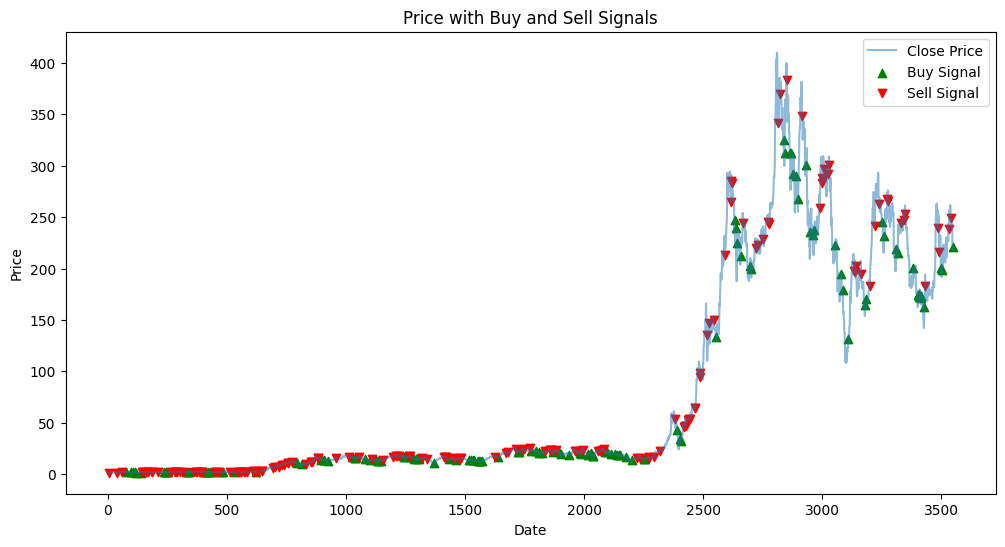

In [14]:
plt.figure(figsize=(12, 6))

# Plot the main price line
plt.plot(data['Adj Close'], label='Close Price', alpha=0.5)

# Plot Buy Signals
plt.scatter(data.loc[data['Buy_Signal']].index, 
            data.loc[data['Buy_Signal'], 'Adj Close'], 
            label='Buy Signal', 
            marker='^', 
            color='green')

# Plot Sell Signals
plt.scatter(data.loc[data['Sell_Signal']].index, 
            data.loc[data['Sell_Signal'], 'Adj Close'], 
            label='Sell Signal', 
            marker='v', 
            color='red')

plt.legend()
plt.title("Price with Buy and Sell Signals")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


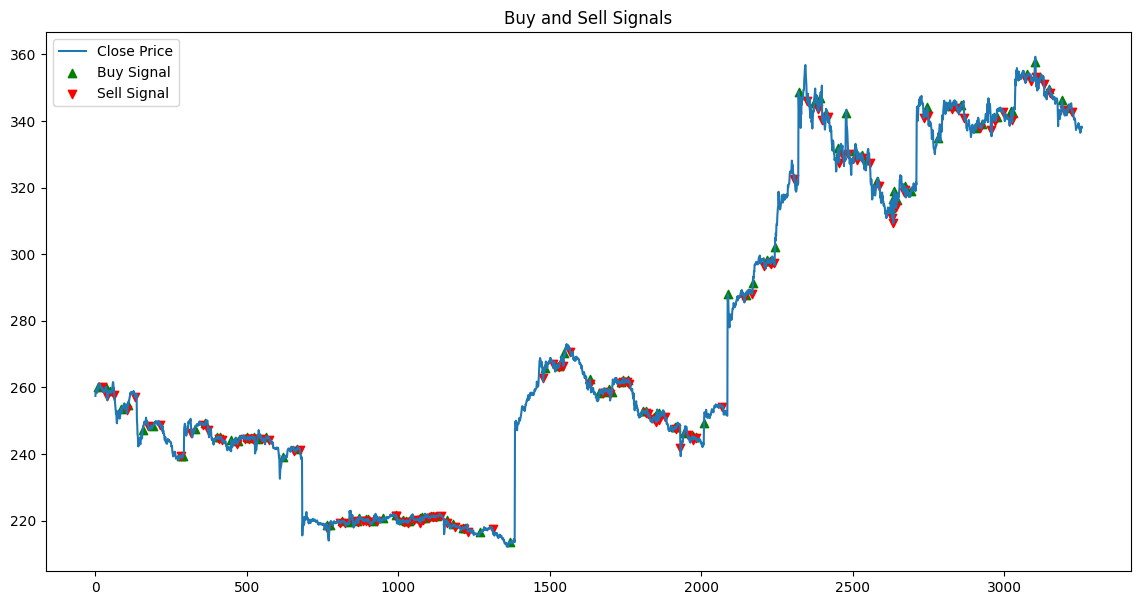

In [15]:
# Filter rows with Buy and Sell Signals
buy_signals = data_5m[data_5m['Buy_Signal'] == True]
sell_signals = data_5m[data_5m['Sell_Signal'] == True]

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data_5m.index, data_5m['Adj Close'], label='Close Price')  # Plot close price

# Use the indices of buy and sell signals for scatter plots
plt.scatter(buy_signals.index, buy_signals['Adj Close'], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(sell_signals.index, sell_signals['Adj Close'], label='Sell Signal', marker='v', color='red', alpha=1)

plt.title('Buy and Sell Signals')
plt.legend()
plt.show()


In [19]:
data.to_csv('./data/data')
data_5m.to_csv('./data/data_5m')

In [16]:
data_set = data.iloc[:, 0:17]#.values
pd.set_option('display.max_columns', None)

data_set.tail(25)

Price,Adj Close,High,Low,Open,RSI,EMAF,EMAM,VWAP,ATR,BB_Upper,BB_Middle,BB_Lower,Buy_Signal,Sell_Signal
3527,230.289993,232.669998,226.320007,228.000000,57.149168,222.847960,215.255616,229.760000,10.921024,236.412870,226.134000,215.855129,False,False
3528,226.779999,229.960007,223.529999,229.300003,54.825610,223.562876,215.707553,226.756668,10.623808,231.472774,228.235999,224.999223,False,False
3529,227.869995,234.570007,226.550003,229.449997,55.431612,224.345989,216.184511,229.663335,10.437822,231.165747,228.575998,225.986249,False,False
3530,227.199997,235.679993,226.880005,230.089996,54.943709,224.864899,216.616491,229.919998,10.320834,231.204954,228.389996,225.575039,False,False
3531,243.919998,244.240005,232.130005,234.000000,63.562901,228.329463,217.687217,240.096670,10.800775,244.150346,231.211996,218.273647,False,False
3532,238.250000,243.990005,235.919998,241.520004,59.412230,230.133197,218.493601,239.386668,10.605720,246.811487,232.803998,218.796509,False,True
3533,250.000000,250.000000,241.919998,242.610001,64.574806,233.745343,219.729146,247.306666,10.687454,255.265796,237.447998,219.630200,False,False
3534,254.270004,257.190002,249.050003,254.080002,66.254618,237.477099,221.083689,253.503337,10.505493,261.674072,242.728000,223.781928,False,False
3535,257.019989,257.049988,252.279999,252.539993,67.329093,241.030352,222.492956,255.449992,10.095814,262.373746,248.691998,235.010251,False,False
3536,254.220001,261.750000,251.529999,260.600006,65.057705,243.428470,223.737154,255.833333,10.104685,264.035269,250.751999,237.468729,False,False


In [10]:
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[3.70449482e-04 2.98618671e-04 3.94137958e-04 ... 4.42785534e-04
  2.39992759e-04 2.30423158e-05]
 [3.39441881e-04 3.97082970e-04 4.00732726e-04 ... 4.13764891e-04
  2.33604678e-04 2.37925649e-05]
 [3.44337603e-04 3.08303495e-04 4.22171916e-04 ... 3.88034562e-04
  2.27467070e-04 2.46190015e-05]
 ...
 [5.33921279e-01 5.39391892e-01 5.33599721e-01 ... 6.48265950e-01
  6.85245271e-01 6.96968576e-01]
 [5.38229557e-01 5.35905341e-01 5.38077039e-01 ... 6.44379607e-01
  6.85295635e-01 6.97200710e-01]
 [5.37152478e-01 5.34113613e-01 5.35529172e-01 ... 6.40747573e-01
  6.85317726e-01 6.97410822e-01]]


In [11]:
# multiple feature from data provided to the model
X = []


backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

3452
[[[3.70449482e-04 2.98618671e-04 3.94137958e-04 ... 4.42785534e-04
   2.39992759e-04 2.30423158e-05]
  [3.39441881e-04 3.97082970e-04 4.00732726e-04 ... 4.13764891e-04
   2.33604678e-04 2.37925649e-05]
  [3.44337603e-04 3.08303495e-04 4.22171916e-04 ... 3.88034562e-04
   2.27467070e-04 2.46190015e-05]
  ...
  [3.55762024e-04 3.58343098e-04 4.32066722e-04 ... 1.66485252e-04
   8.82180864e-05 2.61311962e-05]
  [3.65553468e-04 3.19603514e-04 3.99085509e-04 ... 1.66586738e-04
   8.54966791e-05 2.72998825e-05]
  [2.31734538e-04 2.79248735e-04 3.44664811e-04 ... 1.52288811e-04
   7.94404090e-05 2.60989749e-05]]

 [[3.39441881e-04 3.97082970e-04 4.00732726e-04 ... 4.13764891e-04
   2.33604678e-04 2.37925649e-05]
  [3.44337603e-04 3.08303495e-04 4.22171916e-04 ... 3.88034562e-04
   2.27467070e-04 2.46190015e-05]
  [2.93747114e-04 2.63106303e-04 3.36417812e-04 ... 3.59314670e-04
   2.20169875e-04 2.45445145e-05]
  ...
  [3.65553468e-04 3.19603514e-04 3.99085509e-04 ... 1.66586738e-04
   8.

In [12]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2737
(2737, 30, 8)
(685, 30, 8)
(2737, 1)
(685, 1)
[[2.40527179e-05]
 [2.16603386e-05]
 [1.92709656e-05]
 ...
 [9.75000063e-01]
 [9.75201530e-01]
 [9.75673205e-01]]


In [16]:
lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

I0000 00:00:1732083416.988237    7038 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732083417.005597    7038 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732083417.005744    7038 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732083417.011598    7038 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732083417.011785    7038 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Epoch 1/30


2024-11-20 06:16:59.019809: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8906


165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 4.8167e-04 - val_loss: 0.0057
Epoch 2/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.0172e-05 - val_loss: 0.0049
Epoch 3/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 6.6526e-06 - val_loss: 0.0024
Epoch 4/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 3.5987e-06 - val_loss: 0.0017
Epoch 5/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 2.9213e-06 - val_loss: 0.0026
Epoch 6/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 2.1087e-06 - val_loss: 0.0019
Epoch 7/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4.7850e-06 - val_loss: 0.0012
Epoch 8/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.6312e-06 - val_loss: 8.7195e-04
Epoch 9/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.1419e-06 - val_loss: 0.0017
Epoch 10/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.0285e-06 - val_loss: 0.0042
Epoch 11/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.4877e-06 - val_loss: 0.0014
Epoc

In [17]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[0.9322772] [0.97458392]
[0.9290966] [0.97375668]
[0.92565817] [0.97423758]
[0.92520076] [0.9746336]
[0.92567885] [0.97465705]
[0.92533123] [0.97447176]
[0.92432046] [0.97475085]
[0.9242259] [0.97479686]
[0.9244238] [0.9750527]
[0.9245862] [0.97544868]


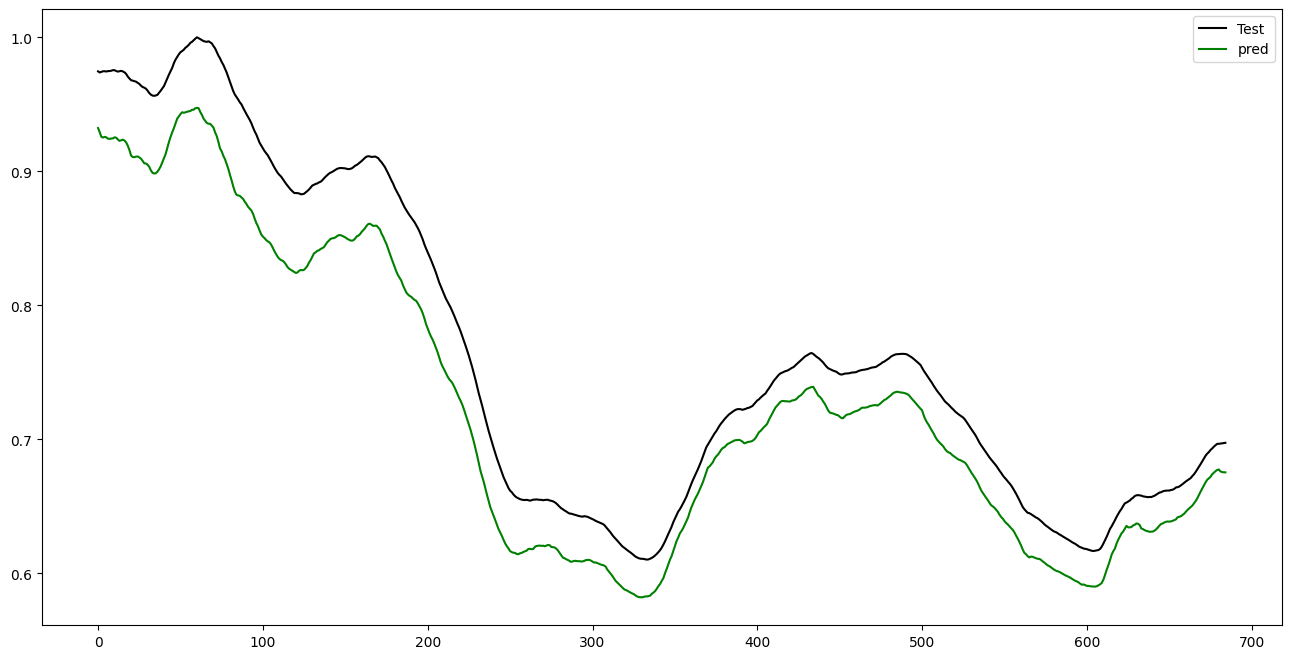

In [18]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()